In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
customers = pd.read_csv("Customers.csv")
transactions = pd.read_csv("Transactions.csv")

In [3]:
print(customers.head())
print(transactions.head())

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price  
0      300.68  300.68  
1      300.68  300.68  
2      300.68  300.68  
3      601.36  300.68  
4      902.04  300.68  


In [4]:
merged_data = pd.merge(transactions, customers, on="CustomerID")

customer_profiles = merged_data.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum',
}).reset_index()

print(customer_profiles.head())


  CustomerID  TotalValue  Quantity
0      C0001     3354.52        12
1      C0002     1862.74        10
2      C0003     2725.38        14
3      C0004     5354.88        23
4      C0005     2034.24         7


In [5]:
scaler = StandardScaler()
normalized_data = scaler.fit_transform(customer_profiles[['TotalValue', 'Quantity']])
print(normalized_data[:5])


[[-0.06170143 -0.12203296]
 [-0.87774353 -0.44800021]
 [-0.40585722  0.20393428]
 [ 1.03254704  1.67078689]
 [-0.78392861 -0.93695108]]


In [6]:
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
customer_profiles['Cluster'] = kmeans.fit_predict(normalized_data)
print(customer_profiles.head())


  CustomerID  TotalValue  Quantity  Cluster
0      C0001     3354.52        12        1
1      C0002     1862.74        10        1
2      C0003     2725.38        14        1
3      C0004     5354.88        23        0
4      C0005     2034.24         7        3


In [7]:
db_index = davies_bouldin_score(normalized_data, customer_profiles['Cluster'])
print(f"DB Index for {n_clusters} clusters: {db_index:.4f}")

DB Index for 4 clusters: 0.7213


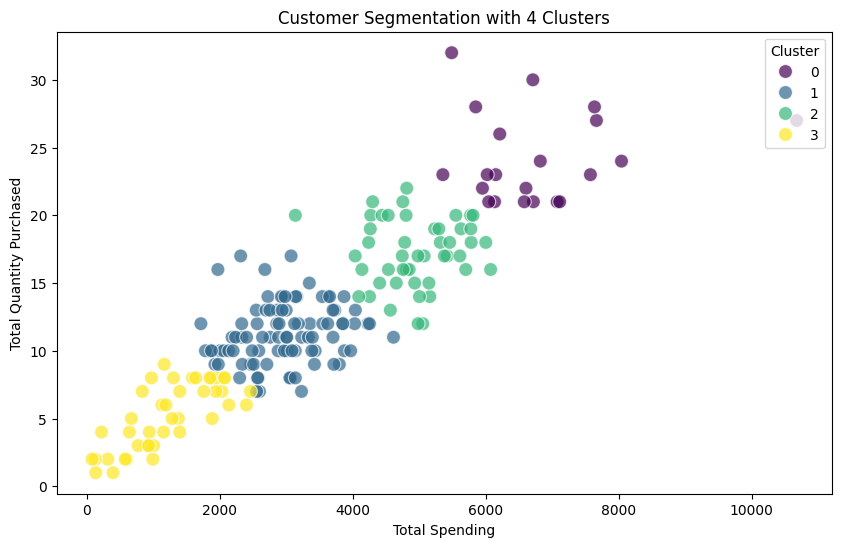

In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=customer_profiles['TotalValue'], y=customer_profiles['Quantity'], hue=customer_profiles['Cluster'], palette='viridis', s=100, alpha=0.7)

plt.title(f"Customer Segmentation with {n_clusters} Clusters")
plt.xlabel("Total Spending")
plt.ylabel("Total Quantity Purchased")
plt.legend(title="Cluster", loc="upper right")
plt.show()

In [9]:
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    customer_profiles['Cluster'] = kmeans.fit_predict(normalized_data)

    # Calculate DB Index for each cluster size
    db_index = davies_bouldin_score(normalized_data, customer_profiles['Cluster'])
    print(f"DB Index for {n_clusters} clusters: {db_index:.4f}")

DB Index for 2 clusters: 0.6267
DB Index for 3 clusters: 0.7087
DB Index for 4 clusters: 0.7213
DB Index for 5 clusters: 0.7767
DB Index for 6 clusters: 0.8225
DB Index for 7 clusters: 0.8784
DB Index for 8 clusters: 0.9432
DB Index for 9 clusters: 0.8807
DB Index for 10 clusters: 0.8138


In [10]:
customer_profiles.to_csv("Customer_Clusters.csv", index=False)

print("Clustering results saved as 'Customer_Clusters.csv'.")

Clustering results saved as 'Customer_Clusters.csv'.
